In [1]:
# following along with https://elitedatascience.com/keras-tutorial-deep-learning-in-python (MNIST dataset) -mt
# attempting to fit model for cats and dogs kaggle dataset: https://www.kaggle.com/c/dogs-vs-cats -mt

### Step 3: Import libraries and modules

In [2]:
# importing numpy and setting a seed for reproductibility
import numpy as np
np.random.seed(123) # kinda irrelevant. not really using randomness. -mt

import os
from tqdm import tqdm
import pandas as pd

In [3]:
# importing standard keras modules/layers/utilities
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K

Using TensorFlow backend.


In [4]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [5]:
from matplotlib import pyplot as plt
%matplotlib inline

#### Second attempt using: https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html -mt

Directory structure looks like:
```
catdog_small_training_dir/
    train/
        dogs/
            dog001.jpg
            dog002.jpg
            ...
        cats/
            cat001.jpg
            cat002.jpg
            ...
    validation/
        dogs/
            dog001.jpg
            dog002.jpg
            ...
        cats/
            cat001.jpg
            cat002.jpg
            ...
```            

### Step 4: Point to images for dataset creation (later)

In [6]:
# dimensions of our images.
img_width, img_height = 250, 250

train_data_dir = 'catdog_small_training_dir/train'
validation_data_dir = 'catdog_small_training_dir/validation'

In [7]:
nb_train_samples = 10000
nb_validation_samples = 200
epochs = 60
batch_size = 64

In [8]:
# reshape array shapes as needed (tensorflow vs theano)
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

### Step 5: Define model

In [9]:
model = Sequential()
model.add(Convolution2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 248, 248, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 248, 248, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 124, 124, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 122, 122, 32)      9248      
_________________________________________________________________
activation_2 (Activation)    (None, 122, 122, 32)      0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 61, 61, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 59, 59, 64)        18496     
__________

In [11]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

### Step 6: Data augmentation

In [12]:
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rotation_range=40,
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest',
    horizontal_flip=True)

In [13]:
# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [14]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 10000 images belonging to 2 classes.


In [15]:
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 200 images belonging to 2 classes.


#### Test data augmentation

In [16]:
# img = load_img('/Users/minhgeneralassembly/Downloads/kaggle_catsanddogs/small_training_dir/train/cats/cat.0.jpg')  # this is a PIL image
# x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
# x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

In [17]:
# i = 0
# for batch in train_datagen.flow(x, batch_size=1,
#                           save_to_dir='/Users/minhgeneralassembly/Downloads/kaggle_catsanddogs/preview', save_prefix='cat', save_format='jpeg'):
#     i += 1
#     if i > 20:
#         break  # otherwise the generator would loop indefinitely

### Step 7: Fit model

In [18]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/60
156/156 [==============================] - 1028s 7s/step - loss: 0.7182 - acc: 0.5413 - val_loss: 0.6515 - val_acc: 0.6406
Epoch 2/60
156/156 [==============================] - 999s 6s/step - loss: 0.6366 - acc: 0.6440 - val_loss: 0.4902 - val_acc: 0.7941
Epoch 3/60
156/156 [==============================] - 1003s 6s/step - loss: 0.5935 - acc: 0.6899 - val_loss: 0.5389 - val_acc: 0.7941
Epoch 4/60
156/156 [==============================] - 992s 6s/step - loss: 0.5609 - acc: 0.7147 - val_loss: 0.4783 - val_acc: 0.7426
Epoch 5/60
156/156 [==============================] - 990s 6s/step - loss: 0.5443 - acc: 0.7348 - val_loss: 0.3795 - val_acc: 0.8438
Epoch 6/60
156/156 [==============================] - 988s 6s/step - loss: 0.5297 - acc: 0.7408 - val_loss: 0.4224 - val_acc: 0.8235
Epoch 7/60
156/156 [==============================] - 991s 6s/step - loss: 0.5172 - acc: 0.7490 - val_loss: 0.4576 - val_acc: 0.7794
Epoch 8/60
156/156 [==============================] - 986s 6s/step 

### Step 7.5: Save model

In [19]:
import datetime

In [20]:
model.save('catsndogs_' + str(datetime.date.today()).replace("-","") + '.h5')

### Step 7.9: Reload model (if needed)

In [21]:
# model = load_model('catsndogs.h5')

### Step 8: Evaluate model

In [22]:
print(history.history.keys())

['acc', 'loss', 'val_acc', 'val_loss']


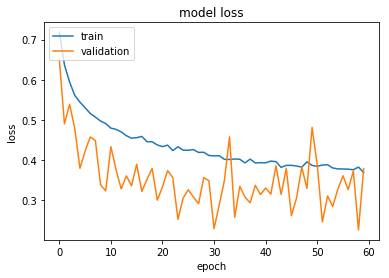

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

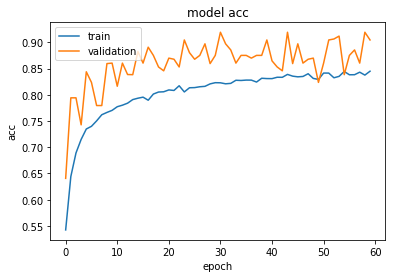

In [24]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model acc')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
break

To do:

• tinker with pipelines (see lesson 18)

• figure out a way to display images with their predicted class (see lesson 17)

### Step 10: Compare test images vs predicted classes

In [25]:
def cropResizeImages(img):
    width, height = img.size

    if width > height:
        left = (width - height)/2
        top = (height - height)/2
        right = (width + height)/2
        bottom = (height + height)/2
        
        img = img.crop((left, top, right, bottom))
        img = img.resize([img_width,img_height])
    
    elif height > width:
        left = (width - width)/2
        top = (height - width)/2
        right = (width + width)/2
        bottom = (height + width)/2
        
        img = img.crop((left, top, right, bottom))
        img = img.resize([img_width,img_height])
        
    return img

In [26]:
# taken from lesson 17 + tinkering. -mt

In [27]:
test_img_dir = "catdog_small_testing_dir/" # actual testing directory

test_images = [test_img_dir + f for f in os.listdir(test_img_dir) if f.endswith('.jpg')]

In [28]:
test_images[0]

'catdog_small_testing_dir/63.jpg'

In [29]:
test_data = []

for test_image in tqdm(test_images):
    img = load_img(test_image)
    img = cropResizeImages(img)
    img = np.array(img)
    test_data.append(img)

100%|██████████| 100/100 [00:00<00:00, 193.29it/s]


In [30]:
df = pd.DataFrame(test_images, columns=['image_name'])

In [31]:
df.head()

,image_name
0,catdog_small_testing_dir/63.jpg
1,catdog_small_testing_dir/77.jpg
2,catdog_small_testing_dir/88.jpg
3,catdog_small_testing_dir/89.jpg
4,catdog_small_testing_dir/76.jpg


In [32]:
df['image'] = df['image_name'].map(lambda x: '<img src="{}" style="max-height: 300px; max-width: 300px;" ></img>'.format(x) )

In [33]:
df.head()

,image_name,image
0,catdog_small_testing_dir/63.jpg,"<img src=""catdog_small_testing_dir/63.jpg"" sty..."
1,catdog_small_testing_dir/77.jpg,"<img src=""catdog_small_testing_dir/77.jpg"" sty..."
2,catdog_small_testing_dir/88.jpg,"<img src=""catdog_small_testing_dir/88.jpg"" sty..."
3,catdog_small_testing_dir/89.jpg,"<img src=""catdog_small_testing_dir/89.jpg"" sty..."
4,catdog_small_testing_dir/76.jpg,"<img src=""catdog_small_testing_dir/76.jpg"" sty..."


In [34]:
df['predict_class'] = ''

for i,each in tqdm(df.iterrows()):
    each['predict_class'] = model.predict_classes(test_data[i][np.newaxis, :, :, :])

100it [00:04, 24.82it/s]


In [35]:
df.head()

,image_name,image,predict_class
0,catdog_small_testing_dir/63.jpg,"<img src=""catdog_small_testing_dir/63.jpg"" sty...",[[1]]
1,catdog_small_testing_dir/77.jpg,"<img src=""catdog_small_testing_dir/77.jpg"" sty...",[[1]]
2,catdog_small_testing_dir/88.jpg,"<img src=""catdog_small_testing_dir/88.jpg"" sty...",[[0]]
3,catdog_small_testing_dir/89.jpg,"<img src=""catdog_small_testing_dir/89.jpg"" sty...",[[0]]
4,catdog_small_testing_dir/76.jpg,"<img src=""catdog_small_testing_dir/76.jpg"" sty...",[[1]]


In [36]:
from IPython.display import HTML

In [37]:
pd.set_option('max_colwidth', 300)
HTML(df.to_html(escape=False))

,image_name,image,predict_class
0,catdog_small_testing_dir/63.jpg,,[[1]]
1,catdog_small_testing_dir/77.jpg,,[[1]]
2,catdog_small_testing_dir/88.jpg,,[[0]]
3,catdog_small_testing_dir/89.jpg,,[[0]]
4,catdog_small_testing_dir/76.jpg,,[[1]]
5,catdog_small_testing_dir/62.jpg,,[[0]]
6,catdog_small_testing_dir/74.jpg,,[[1]]
7,catdog_small_testing_dir/60.jpg,,[[0]]
8,catdog_small_testing_dir/48.jpg,,[[1]]
9,catdog_small_testing_dir/49.jpg,,[[1]]


In [ ]:
break

### Step 10: Test things

In [ ]:
def cropResizeImages(img):
    width, height = img.size

    if width > height:
        left = (width - height)/2
        top = (height - height)/2
        right = (width + height)/2
        bottom = (height + height)/2
        
        img = img.crop((left, top, right, bottom))
        img = img.resize([img_width,img_height])
    
    elif height > width:
        left = (width - width)/2
        top = (height - width)/2
        right = (width + width)/2
        bottom = (height + width)/2
        
        img = img.crop((left, top, right, bottom))
        img = img.resize([img_width,img_height])
        
    return img

In [ ]:
# test_img = "/Users/minhgeneralassembly/Downloads/kaggle_catsanddogs/small_testing_dir/11.jpg" # cat
# test_img = "/Users/minhgeneralassembly/Downloads/kaggle_catsanddogs/small_testing_dir/27.jpg" # dog
# test_img = "/Users/minhgeneralassembly/Downloads/kaggle_catsanddogs/small_testing_dir/82.jpg" # cat
test_img = "/Users/minhgeneralassembly/Downloads/kaggle_catsanddogs/small_training_dir/train/cats/cat.100.jpg" #cat, training
# test_img = "/Users/minhgeneralassembly/Downloads/kaggle_catsanddogs/small_training_dir/train/dogs/dog.100.jpg" #dog

In [ ]:
test_img = load_img(test_img)

In [ ]:
test_img_cropped = cropResizeImages(test_img)
test_img_in = np.array(test_img_cropped)
plt.imshow(test_img_in);

In [ ]:
preds = model.predict_classes(test_img_in[np.newaxis, :, :, :])
probs = model.predict_proba(test_img_in[np.newaxis, :, :, :])
print(preds, probs)